Part (a): Creating scatterplot matrix


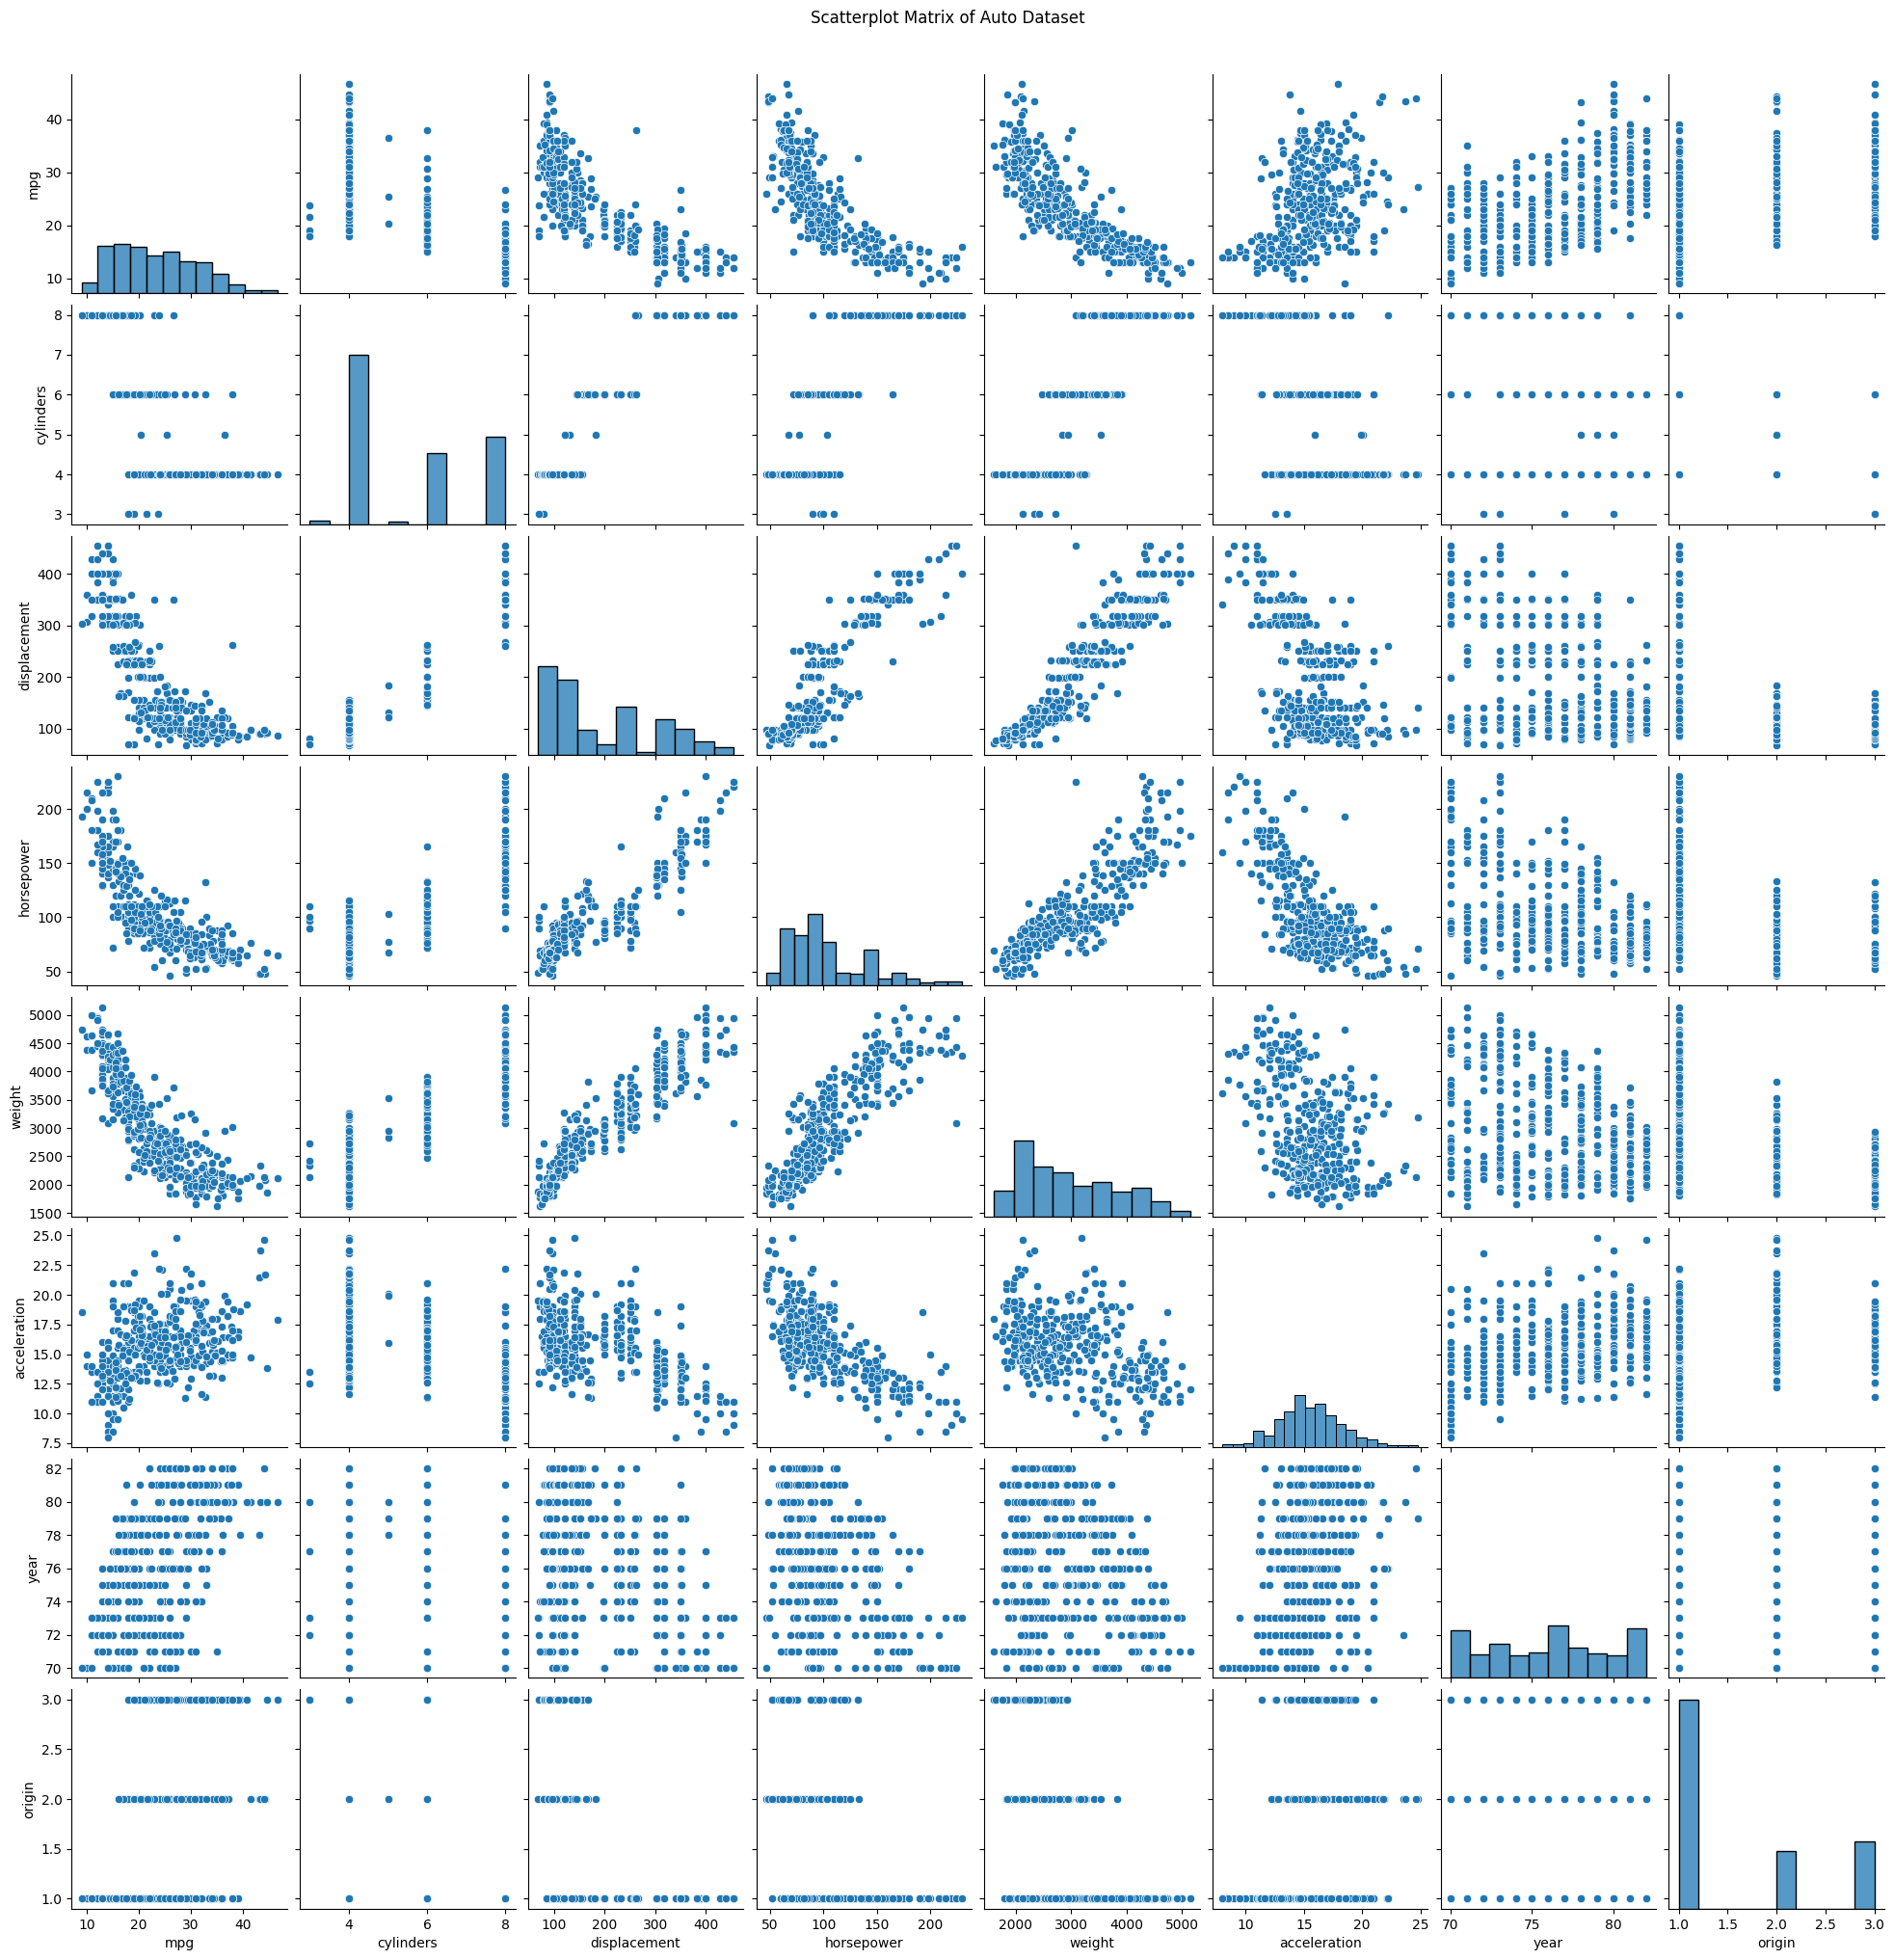


Part (b): Computing correlation matrix


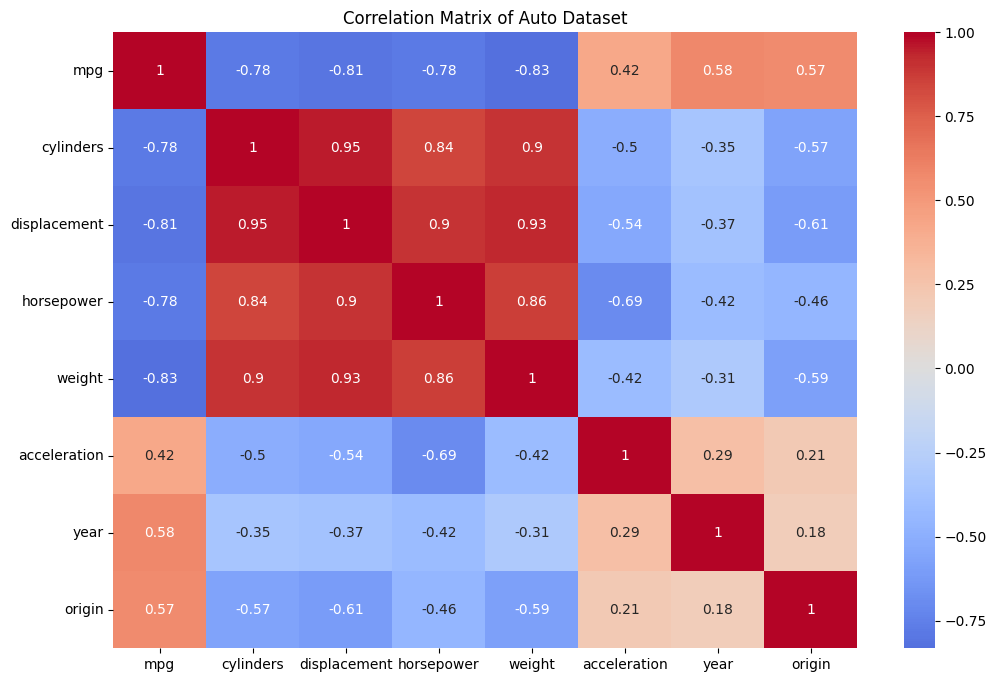


Part (c): Performing multiple linear regression

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          2.04e-139
Time:                        05:42:23   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

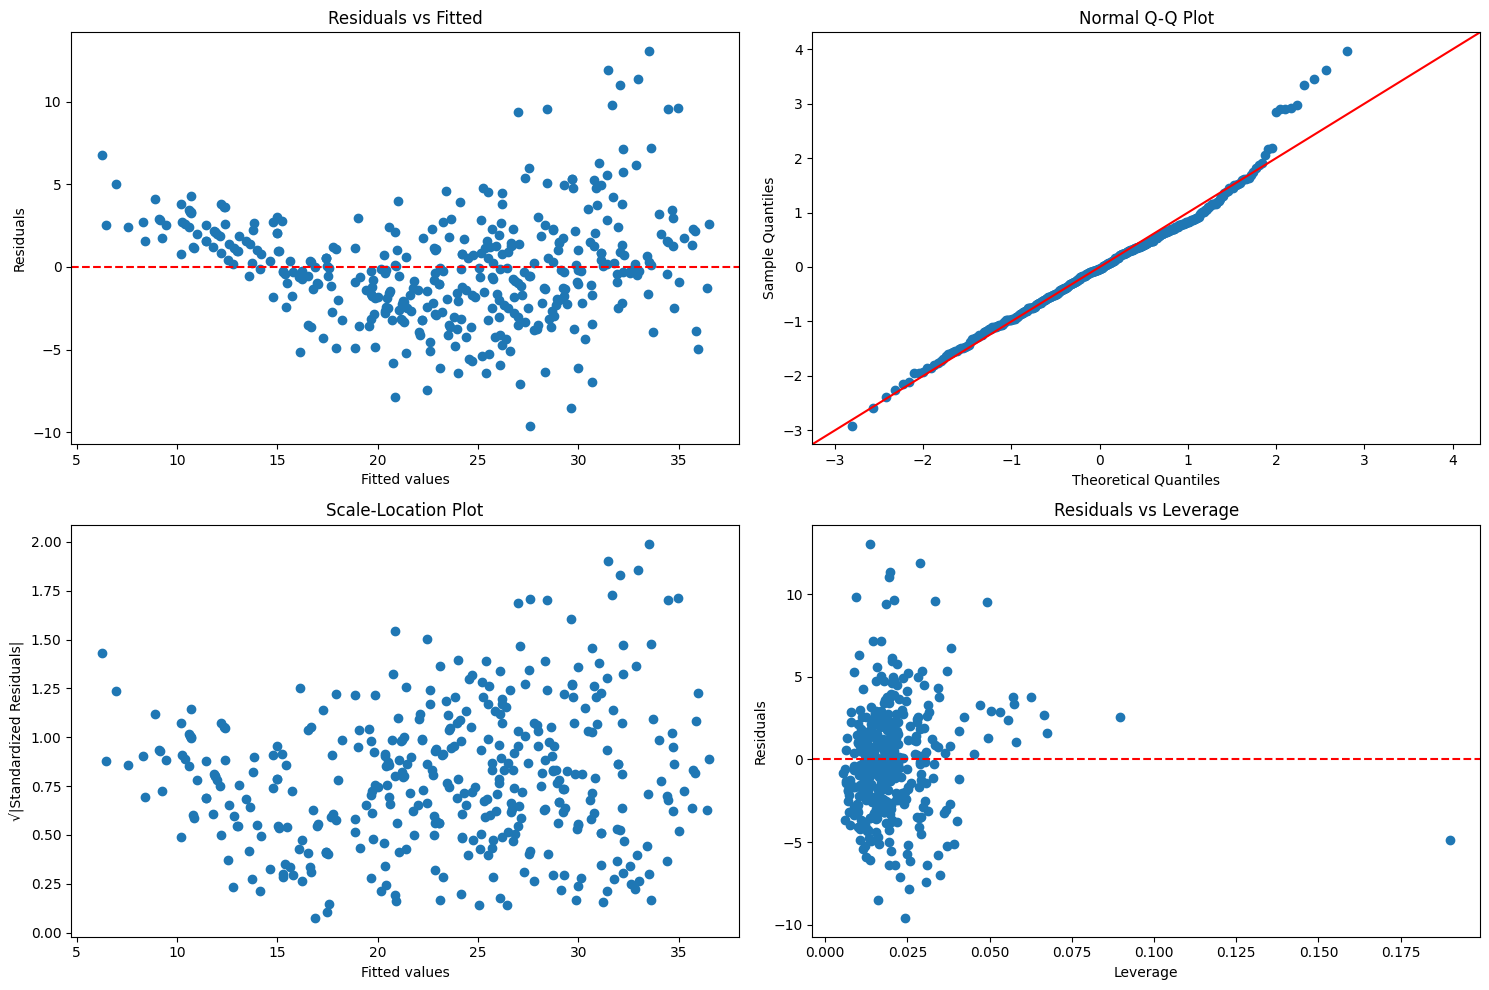


Part (e): Testing interactions

Model with horsepower-weight interaction:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Mon, 21 Oct 2024   Prob (F-statistic):          1.88e-159
Time:                        05:42:24   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [2]:
# Exercise 9: Multiple Linear Regression with Auto Dataset
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.anova import anova_lm

# Dataset
auto_data = pd.read_csv('Auto.csv')

# Handle missing values or non-numeric values
auto_data.replace('?', np.nan, inplace=True)
auto_data.dropna(inplace=True)

# Convert relevant columns to numeric if needed
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'], errors='coerce')

# Part (a): Scatterplot matrix
print("Part (a): Creating scatterplot matrix")
# Select numeric columns only
numeric_cols = auto_data.select_dtypes(include=[np.number]).columns
sns.pairplot(auto_data[numeric_cols])
plt.suptitle('Scatterplot Matrix of Auto Dataset', y=1.02)
plt.show()

# Part (b): Correlation matrix
print("\nPart (b): Computing correlation matrix")
correlation_matrix = auto_data[numeric_cols].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Auto Dataset')
plt.show()

# Part (c): Multiple linear regression
print("\nPart (c): Performing multiple linear regression")

# Remove 'name' column and separate response variable
X = auto_data.drop(['mpg', 'name'], axis=1)
y = auto_data['mpg']

# Convert categorical variables to dummy variables if any
X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid multicollinearity

# Ensureing all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# constant term
X = sm.add_constant(X)

# Prepare the formula for regression
formula = 'mpg ~ ' + ' + '.join(X.columns.difference(['const']))

# Fit the model using the formula-based OLS
model = smf.ols(formula=formula, data=auto_data).fit()

# Print summary
print("\nRegression Summary:")
print(model.summary())

# Perform ANOVA
anova_results = anova_lm(model, typ=2)
print("\nANOVA Results:")
print(anova_results)

# Part (d): Diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(model.fittedvalues, model.resid)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q plot
sm.graphics.qqplot(model.resid, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot')

# 3. Scale-Location Plot
standardized_resid = np.sqrt(np.abs(model.resid/np.std(model.resid)))
axes[1, 0].scatter(model.fittedvalues, standardized_resid)
axes[1, 0].set_xlabel('Fitted values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')

# 4. Leverage Plot
influence = OLSInfluence(model)
axes[1, 1].scatter(influence.hat_matrix_diag, model.resid)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

# Part (e): Models with interactions
print("\nPart (e): Testing interactions")

# Example: Testing interaction between horsepower and weight
X['horsepower_weight'] = X['horsepower'] * X['weight']
interaction_model = sm.OLS(y, X).fit()
print("\nModel with horsepower-weight interaction:")
print(interaction_model.summary())

# Part (f): Variable transformations
print("\nPart (f): Testing variable transformations")

# Create transformed variables
X_transform = X.copy()
X_transform['horsepower_squared'] = X['horsepower'] ** 2
X_transform['weight_sqrt'] = np.sqrt(X['weight'])
X_transform['horsepower_log'] = np.log(X['horsepower'].replace(0, np.nan))  # Avoid log(0)

# Fit model with transformations
transform_model = sm.OLS(y, X_transform).fit()
print("\nModel with transformed variables:")
print(transform_model.summary())


(c)eight, year, origin, and displacement are all statistically significant indicators of mpg. Fuel economy (mpg) tends to increase with vehicle age, according to the year's positive coefficient.

Risidual vs fitted plot: As the fitted values increase, this residual plot displays a little funnel form. Although there are several outliers when the fitted values are more than 25, it is still a better depiction than the prior residual graphic.

(e) The close connection between year and weight implies that the weight of newer automobiles affects their fuel efficiency (mpg).

log transfomation: By making a number of factors statistically significant—particularly horsepower, weight, acceleration, year, and origin—the log transformation seems to have improved the model. According to the correlations, fuel efficiency rises with weight and horsepower while falling with newer cars and automobiles from certain countries.

square root transfomation: The negative coefficients for weight and horsepower imply that mpg falls as these numbers rise. The positive coefficients for year and origin show that mpg improves for some origins and as the year goes on.

Square transfomation: Many important predictors, including cylinders, displacement, weight, acceleration, year, and origin, have been identified using the squared transformation.